<a href="https://colab.research.google.com/github/anuragkj/GDSC_ML_Training_Project_1/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
invoice_test = pd.read_csv('/content/drive/MyDrive/Project_1_data/Test/invoice_test.csv')
invoice_train = pd.read_csv('/content/drive/MyDrive/Project_1_data/Train/invoice_train.csv')
client_test = pd.read_csv('/content/drive/MyDrive/Project_1_data/Test/client_test.csv')
client_train = pd.read_csv('/content/drive/MyDrive/Project_1_data/Train/client_train.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Project_1_data/SampleSubmission.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(invoice_test.shape, invoice_train.shape, client_test.shape, client_train.shape)

(1939730, 16) (4476749, 16) (58069, 5) (135493, 6)


In [ ]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [ ]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [ ]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [ ]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [ ]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [ ]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")
#Getting unique values on the client train data
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")
    

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2
disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [ ]:
invoice_train['counter_statue'].unique()

array([0, 1, 5, 4, 3, 2, 769, '0', '5', '1', '4', 'A', 618, 269375, 46,
       420], dtype=object)

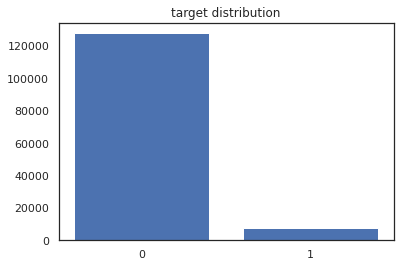

In [ ]:
ds = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

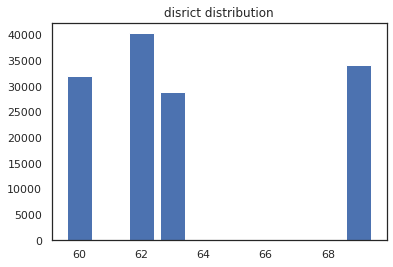

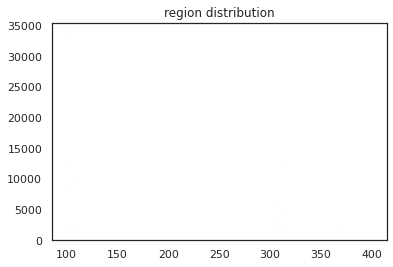

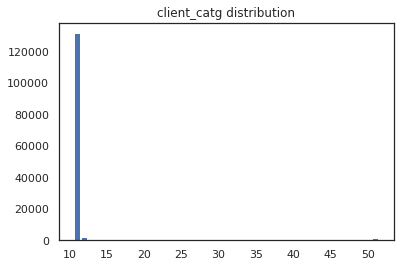

In [ ]:
for col in ['disrict','region','client_catg']:
    ds = client_train.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

In [ ]:
print('Number of missing rows in invoice_train:',invoice_train.isna().sum().sum())
print('Number of missing rows in invoice_test:',invoice_test.isna().sum().sum(),'\n')
print('Number of missing rows in client_train:',client_train.isna().sum().sum())
print('Number of missing rows in client_test:',client_test.isna().sum().sum())

Number of missing rows in invoice_train: 0
Number of missing rows in invoice_test: 0 

Number of missing rows in client_train: 0
Number of missing rows in client_test: 0


In [ ]:
print('Number of unique values in invoice_train:')
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

Number of unique values in invoice_train:
client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [ ]:
def feature_change(cl, inv):

    cl['client_catg'] = cl['client_catg'].astype('category')
    cl['disrict'] = cl['disrict'].astype('category')
    cl['region'] = cl['region'].astype('category')
    cl['region_group'] = cl['region'].apply(lambda x: 100 if x<100 else 300 if x>300 else 200)
    cl['creation_date'] = pd.to_datetime(cl['creation_date'])
    
    cl['coop_time'] = (2019 - cl['creation_date'].dt.year)*12 - cl['creation_date'].dt.month

    inv['counter_type'] = inv['counter_type'].map({"ELEC":1,"GAZ":0})
    inv['counter_statue'] = inv['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'769':5,'A':0,'618':5,'269375':5,'46':5,'420':5})
    
    inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], dayfirst=True)
    inv['invoice_month'] = inv['invoice_date'].dt.month
    inv['invoice_year'] = inv['invoice_date'].dt.year
    inv['is_weekday'] = ((pd.DatetimeIndex(inv.invoice_date).dayofweek) // 5 == 1).astype(float)
    
    return cl, inv

-'client_catg', 'district' and 'region' were assigned as categories to use them as categorical features in lgbm (as for me, lgbm for default threats with cat features slightly better than other encoders such as catboost/target encoder)

-'region_group' created simply by dividing 'region' in 3 groups (we purposed that regions weren't randomly decoded)

-'coop_time' - amount of time since account creation in months

-'counter_type' was binary encoded

-'counter_statue' cleaned from mislabeled values

-extracted month, year from 'invoice_date', also added binary feature - 'is_weekday'

In [ ]:
client_train1, invoice_train1 = feature_change(client_train, invoice_train)
client_test1, invoice_test1 = feature_change(client_test, invoice_test)

In [ ]:
invoice_train1.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,invoice_month,invoice_year,is_weekday
0,train_Client_0,2014-03-24,11,1335667,0.0,203,8,1,82,0,0,0,14302,14384,4,1,3,2014,0.0
1,train_Client_0,2013-03-29,11,1335667,0.0,203,6,1,1200,184,0,0,12294,13678,4,1,3,2013,0.0
2,train_Client_0,2015-03-23,11,1335667,0.0,203,8,1,123,0,0,0,14624,14747,4,1,3,2015,0.0
3,train_Client_0,2015-07-13,11,1335667,0.0,207,8,1,102,0,0,0,14747,14849,4,1,7,2015,0.0
4,train_Client_0,2016-11-17,11,1335667,0.0,207,9,1,572,0,0,0,15066,15638,12,1,11,2016,0.0


In [ ]:
invoice_test1['counter_statue'] = invoice_test1['counter_statue'].astype('int64') #It's initialy an object

In [ ]:
def agg_feature(invoice, client_df, agg_stat):
    
    agg_trans = invoice.groupby('client_id')[agg_stat].agg(['mean','std','min','max'])
    
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = invoice.groupby('client_id').size().reset_index(name='transactions_count')
    agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')
    
    
    
    full_df = pd.merge(client_df, agg_trans, on='client_id', how='left')
    
    return full_df

In [ ]:
agg_stat_columns = [
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type',
 'invoice_month',
 'invoice_year'
]

train_df1 = agg_feature(invoice_train1, client_train1, agg_stat_columns)
test_df1 = agg_feature(invoice_test1, client_test1, agg_stat_columns)

In [ ]:
train_df1.sample(10)

,disrict,client_id,client_catg,region,creation_date,target,region_group,coop_time,transactions_count,tarif_type_mean,...,counter_type_min,counter_type_max,invoice_month_mean,invoice_month_std,invoice_month_min,invoice_month_max,invoice_year_mean,invoice_year_std,invoice_year_min,invoice_year_max
46202,69,train_Client_19636,11,107,2017-07-28,0.0,200,17,4,11.000000,...,1,1,9.500000,2.645751,6,12,2018.250000,0.957427,2017,2019
125811,62,train_Client_91284,12,310,1993-09-14,0.0,300,303,64,27.312500,...,0,1,8.218750,3.302086,4,12,2011.109375,3.863205,2005,2019
25699,62,train_Client_123125,11,301,2018-01-18,0.0,300,11,3,11.000000,...,1,1,2.333333,2.309401,1,5,2018.333333,0.577350,2018,2019
110627,62,train_Client_77619,11,309,2002-01-21,0.0,300,203,68,22.941176,...,0,1,6.588235,3.333392,2,11,2012.897059,3.777940,2005,2019
104245,69,train_Client_71875,11,103,1979-12-11,1.0,200,468,38,10.394737,...,1,1,6.157895,3.537646,1,12,2011.868421,4.140577,2005,2019
123132,62,train_Client_88874,11,309,1995-07-06,0.0,300,281,78,25.500000,...,0,1,5.153846,3.227628,1,11,2011.794872,3.955463,2005,2019
7680,60,train_Client_106909,11,101,1983-02-25,0.0,200,430,63,22.380952,...,0,1,4.936508,3.291597,1,11,2012.492063,4.023612,2005,2019
94906,60,train_Client_6347,11,101,1979-08-14,0.0,200,472,67,22.686567,...,0,1,6.328358,3.522172,1,12,2012.238806,3.697213,2005,2019
84917,60,train_Client_5448,11,101,2008-04-22,0.0,200,128,8,25.500000,...,0,1,6.750000,2.549510,2,10,2008.500000,0.534522,2008,2009
28168,69,train_Client_125348,11,107,2013-01-08,1.0,200,71,25,26.080000,...,0,1,5.640000,3.882439,1,12,2016.440000,1.556706,2014,2019


In [ ]:
def new_features(df):
    for col in agg_stat_columns:
        df[col+'_range'] = df[col+'_max'] - df[col+'_min']
        df[col+'_max_mean'] = df[col+'_max']/df[col+'_mean']
    return df

In [ ]:
train_df2 = new_features(train_df1)
test_df2 = new_features(test_df1)

In [ ]:
test_df2 = test_df2.apply(lambda x:x.fillna(x.value_counts().index[0]))
train_df2 = train_df2.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
print('Initial number of columns: ', len(client_train.columns)+len(invoice_train.columns))
print('Number of columns now: ', len(train_df2.columns))

Initial number of columns:  27
Number of columns now:  99


In [ ]:
def drop(df):

    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        df.drop([col], axis=1, inplace=True)
    return df

In [ ]:
train_df = drop(train_df2)
test_df = drop(test_df2)

In [ ]:
y = train_df['target']
X = train_df.drop('target',axis=1)

In [ ]:
X.head()

,disrict,client_catg,region,region_group,coop_time,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,...,new_index_range,new_index_max_mean,months_number_range,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean
0,60,11,101,200,288,35,11.0,0.0,11,11,...,13269,1.741318,10,2.592593,0,1.0,11,1.794872,14,1.003907
1,69,11,107,200,199,37,11.0,0.0,11,11,...,20361,1.680649,6,1.850000,0,1.0,9,1.947368,14,1.003560
2,62,11,301,300,393,18,11.0,0.0,11,11,...,18640,1.323484,8,1.862069,0,1.0,9,1.663866,14,1.004006
3,69,11,105,200,265,20,11.0,0.0,11,11,...,24,1.195595,2,1.428571,0,1.0,9,1.801802,7,1.001693
4,62,11,303,300,50,14,11.0,0.0,11,11,...,12770,1.754937,2,1.076923,0,1.0,10,1.584906,4,1.001062


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_df.head()

,disrict,client_catg,region,region_group,coop_time,transactions_count,tarif_type_mean,tarif_type_std,tarif_type_min,tarif_type_max,...,new_index_range,new_index_max_mean,months_number_range,months_number_max_mean,counter_type_range,counter_type_max_mean,invoice_month_range,invoice_month_max_mean,invoice_year_range,invoice_year_max_mean
0,62,11,307,300,199,37,11.000000,0.000000,11,11,...,18294,1.824477,6,1.827160,0,1.000000,9,1.754941,14,1.003654
1,69,11,103,200,114,22,11.000000,0.000000,11,11,...,56283,1.779176,10,2.640000,0,1.000000,9,1.617647,10,1.002415
2,62,11,310,300,173,74,23.540541,14.465063,11,40,...,38985,3.151995,0,1.000000,1,1.761905,8,1.502538,14,1.003034
3,60,11,101,200,316,40,25.500000,14.684721,11,40,...,31285,2.273207,2,1.025641,1,2.000000,11,2.105263,7,1.001768
4,62,11,301,300,497,53,20.849057,13.865281,11,40,...,41099,2.808215,10,2.650000,1,1.514286,10,1.639175,14,1.003169


In [ ]:
y = np.where(y==0.0,0,1)

In [ ]:
X.isnull().values.sum()

0

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt',num_iteration=1000)
%time model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 1min 4s, sys: 262 ms, total: 1min 4s
Wall time: 1min 4s


LGBMClassifier(num_iteration=1000)

In [ ]:
#model makes a prediction
preds = model.predict_proba(test_df)
# Convert it to a dataframe
preds = pd.DataFrame(preds)
#get a sample of the preds dataframe
preds.head()

,0,1
0,0.979446,0.020554
1,0.926009,0.073991
2,0.995192,0.004808
3,0.999492,0.000508
4,0.989788,0.010212


In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X,y)))

Training accuracy 0.9908


For being able to work with XGB classifier we had to drop 3 more columns which were not integer type

In [ ]:
#X2 = drop_xg(X)
from xgboost import XGBClassifier
model_2 = XGBClassifier()
model_2.fit(X, y)

XGBClassifier()

In [ ]:
print('Training accuracy {:.4f}'.format(model_2.score(X,y)))

Training accuracy 0.9474


In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model_3 = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X, y)
model_3 = model_3.best_estimator_

In [ ]:
print('Training accuracy {:.4f}'.format(model_3.score(X,y)))

Training accuracy 0.9528


The best accuracy was found for LGBMClassifier